### 自然语言处理的任务
1. 文本分类：垃圾邮件，信息分类等
2. 机器翻译
3. 信息提取：情感分析，语音识别，文本摘要
4. 文本生成：生成式AI

### workflow
1. 数据
2. 可视化数据
3. 词处理：词向量化vectorization,tokenization
4. 词关系：嵌入（Embedding） 是一种将离散的符号（如单词）映射到连续向量空间的技术。这个映射过程可以将单词表示成实数向量，使得具有相似语义的单词在向量空间中的距离也是相似的。Word2Vec、GloVe 和 FastText 是一些常用的词嵌入模型的例子。King - Man + Women = Queen
5. baseline-models:RNN(SimpleRNN, LSTM, GRU)，激励函数tanh
6. 模型比较
7. 集成模型ensemble
8. save&load
9. 找到错误的预测进行模型优化

### 自然语言处理（NLP）的流程通常包括以下步骤：

1. **文本收集：** 获取包含自然语言文本的数据，可以是从互联网、数据库、文本文件等各种来源收集而来。

2. **文本清理：** 对文本进行预处理，包括去除特殊字符、标点符号、停用词（在某些情况下）、处理大小写等。这一步骤有助于提高模型的准确性和效果。

3. **分词：** 将文本分割成单词或词汇单元，以便计算机能够理解和处理。分词是 NLP 流程中的一个重要步骤，尤其对于处理中文等不使用空格分隔词汇的语言。

4. **词干提取和词形还原：** 将单词转化为它们的基本形式，以减少词汇的复杂性和提高模型的泛化能力。

5. **词性标注：** 对每个单词标注其在句子中的词性，如名词、动词、形容词等。这对于理解句子的语法结构很有帮助。

6. **实体识别：** 识别文本中的命名实体，如人名、地名、组织机构等。这有助于更深入地理解文本中的信息。

7. **特征提取：** 从文本中提取有用的特征，以供后续的建模和分析使用。特征可以包括词频、句子长度、情感分数等。

8. **模型建立：** 选择适当的模型来处理特定的 NLP 任务，例如文本分类、命名实体识别、情感分析等。常见的模型包括循环神经网络（RNN）、长短时记忆网络（LSTM）、卷积神经网络（CNN）和预训练的语言模型（如BERT）。

9. **模型训练：** 使用带有标签的训练数据对选择的模型进行训练，以使其能够对新的文本数据做出准确的预测。

10. **评估和调优：** 使用测试数据集对训练好的模型进行评估，根据评估结果对模型进行调优，以提高其性能。

11. **应用部署：** 将训练好的模型应用到实际场景中，进行实时的文本处理、分析和应用。

整个 NLP 流程可以根据具体的任务和需求进行调整和扩展。随着深度学习和预训练模型的发展，NLP 在处理自然语言文本方面取得了显著的进展。

In [2]:
import datetime
datetime.datetime.now()

datetime.datetime(2024, 1, 8, 13, 31, 22, 403388)

In [9]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [10]:
unzip_data("nlp_getting_started.zip")

https://www.kaggle.com/competitions/nlp-getting-started

In [11]:
!ls nlp_data/

sample_submission.csv test.csv              train.csv


In [14]:
# use pandas to check data
import pandas as pd
train_df = pd.read_csv("nlp_data/train.csv")
test_df = pd.read_csv("nlp_data/test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [17]:
# shuffled data frac=1，1是百分比表示抽取整个样本
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [18]:
train_df.target.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [21]:
len(train_df), len(test_df)

(7613, 3263)

In [31]:
# visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5) # create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1 (real disaster)
Text:
Georgia sinkhole closes road swallows whole pond http://t.co/cPEQv52LNA

---

Target: 0 (not real disaster)
Text:
One Direction is taking a break after this next album. My heart has sunk it hurts and I'm very upset. They deserve a break. My heart hurts

---

Target: 1 (real disaster)
Text:
Rly tragedy in MP: Some live to recount horror: ÛÏWhen I saw coaches of my train plunging into water I called ... http://t.co/72ix7vM87w

---

Target: 0 (not real disaster)
Text:
@ariabrisard @leiaorganasolo Good. Play along with her. You may begin your operation with the death star. The evacuation is nearly complete.

---

Target: 0 (not real disaster)
Text:
@AGeekyFangirl14 's things she looks in a significant other:
1. Beautiful eyes.
2. Humor.
3. Farts that creates an earthquake.

????????

---



数据集切割，由于test数据没有标签，所以需要将训练集分为训练和测试集进行调试

In [32]:
# split data by sklearn train_test_split
from sklearn.model_selection import train_test_split
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [33]:
# check len of each data set
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(6851, 762, 6851, 762)

In [34]:
# check data sample
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

### Tokenization & Embedding
自然语言处理（NLP）中两个将文本转化为数字表示的主要概念：

1. **Tokenization（标记化）**
   - **Word-level Tokenization（词级标记化）**：将单词直接映射到数字值。例如，使用句子"I love TensorFlow"的词级标记化可能将"I"映射为0，"love"映射为1，"TensorFlow"映射为2。在这种情况下，序列中的每个单词都被视为一个单独的标记。
   - **Character-level Tokenization（字符级标记化）**：将字母A-Z转换为数值1-26。在这种情况下，序列中的每个字符都被视为一个单独的标记。
   - **Sub-word Tokenization（子词级标记化）**：介于词级和字符级标记化之间。它涉及将单词拆分为较小的部分，然后将这些部分转换为数字。例如，"my favourite food is pineapple pizza"可能会被拆分为"my, fav, avour, rite, fo, oo, od, is, pin, ine, app, le, piz, za"。然后，这些子词将被映射到数字值。在这种情况下，每个单词可能被视为多个标记。

2. **Embeddings（嵌入）**
   - **Embedding（嵌入）**是自然语言的一种表示，可以通过学习得到。表示采用特征向量的形式。例如，单词"dance"可能被表示为5维向量[-0.8547, 0.4559, -0.3332, 0.9877, 0.1112]。需要注意的是，特征向量的大小是可以调整的。
   - **创建自己的嵌入**：一旦文本被转化为数字（嵌入所需的形式），可以通过嵌入层（例如`tf.keras.layers.Embedding`）将它们传递，并且在模型训练期间将学习嵌入表示。
   - **重用预先学习的嵌入**：许多在线上存在预先训练的嵌入。这些预训练的嵌入通常是在大量文本语料库（如维基百科）上学到的，因此具有对自然语言的良好基础表示。可以使用预先训练的嵌入来初始化模型，并对其进行微调以适应特定任务。
  
阅读资源：

https://jalammar.github.io/illustrated-word2vec/

https://nlp.stanford.edu/projects/glove/

### 一些重要的概念

**Word2Vec**：将词变成向量。就像是人的五维人格一样，词也可以被表达为维度。还有十六型人格也是，通过各个维度的大小组合，4乘以4，人类被分为16种人格。词语也是他们的向量维度在空间中的表示。https://jalammar.github.io/illustrated-word2vec/

**余弦相似性**：[cosine_similarity](https://zh.wikipedia.org/wiki/%E4%BD%99%E5%BC%A6%E7%9B%B8%E4%BC%BC%E6%80%A7)用来表示向量之间是否相似，是他们空间位置的计算方式。

**神经网络语言建模**：窗口滑动；根据前文猜测接下来的词；根据前后文猜测中间的词（连续词袋构架skipgram）；

**负采样**（Negative Sampling）是一种用于训练词嵌入模型的技术，主要应用于Word2Vec等模型中。其主要目的是缓解训练中的计算负担和提高训练效率。
在Word2Vec等模型中，通常使用Skip-gram或CBOW（Continuous Bag of Words）来学习单词的分布式表示。在这些模型中，每次更新模型参数时，需要考虑目标单词及其上下文单词的组合，形成一个正例（positive example）。
**问题**： 在大规模语料库中，考虑所有单词组合的计算成本非常高昂，因为词汇表可能非常庞大。因此，为了提高效率，引入了负采样的概念。
**原理**： 负采样的核心思想是，对于每个正例，只选择一小部分负例进行训练，而不是考虑全部的负例。具体地说，对于给定的正例（目标单词及其上下文），从词汇表中随机选择一些单词作为负例。这样，每个训练实例只需要更新一小部分参数，从而大大降低了计算成本。

---

**嵌入矩阵和上下文矩阵**：在Word2Vec等词嵌入模型中，训练过程中涉及到两个关键矩阵：嵌入矩阵（Embedding Matrix）和上下文矩阵（Context Matrix）。

1. **嵌入矩阵（Embedding Matrix）：**
   - **作用：** 嵌入矩阵用于将单词映射到分布式表示，也即词嵌入空间。每个单词都被表示为一个向量，而这个向量的维度通常是事先定义好的，比如100维或300维。
   - **训练过程：** 在训练过程中，模型会不断更新嵌入矩阵的参数，使得相似的单词在嵌入空间中更加接近。这样，语义上相近的单词在词嵌入空间中的表示也更加接近。

2. **上下文矩阵（Context Matrix）：**
   - **作用：** 上下文矩阵用于表示上下文单词的分布式表示。在Skip-gram模型中，给定目标单词，上下文矩阵负责表示其上下文中的单词。在CBOW模型中，上下文矩阵表示目标单词的上下文。
   - **训练过程：** 与嵌入矩阵类似，模型也会不断更新上下文矩阵的参数，使得上下文单词在表示空间中更加接近。

**关系：**
- 在训练过程中，通过最小化损失函数，模型调整嵌入矩阵和上下文矩阵的参数，使得模型能够更好地捕捉单词之间的语义关系。
- 具体来说，对于Skip-gram模型，目标是预测上下文单词，而嵌入矩阵的行表示单词的嵌入，上下文矩阵的行表示上下文单词的嵌入。在CBOW模型中，目标是预测目标单词，嵌入矩阵和上下文矩阵的行同样表示对应的单词嵌入。

总体而言，嵌入矩阵和上下文矩阵的优化过程使得模型学到了在嵌入空间中有意义的表示，使得相似的单词具有相近的表示。这些学到的表示可以被用于各种自然语言处理任务，如情感分析、命名实体识别等。

---

**GloVe**（Global Vectors for Word Representation）是一种用于学习词嵌入（Word Embeddings）的模型。它的目标是通过学习全局上下文中单词的分布来获得高质量的词向量表示。

以下是关于GloVe的主要特点和工作原理：

1. **全局上下文信息：** GloVe的设计灵感来自于全局语料库中的全局统计信息。它不同于Word2Vec等模型，这些模型通常在局部上下文窗口内学习。GloVe尝试捕捉整个语料库中单词之间的全局语义关系。

2. **共现矩阵：** GloVe利用单词在上下文中的共现信息。首先，构建一个共现矩阵，其中矩阵的元素(i, j)表示单词i和单词j在同一上下文中出现的次数。这个矩阵捕捉了全局上下文中的单词共现统计。

3. **损失函数：** GloVe的损失函数旨在最小化单词向量的点乘与对数共现概率的差异。通过调整词向量，使得模型在全局上下文中更好地预测单词共现概率。

4. **词向量表示：** 模型学到的词向量表示在空间中捕获了单词之间的语义关系。相似的单词在词向量空间中距离较近，反之则较远。

GloVe的优势在于它不依赖于局部上下文窗口，而是通过全局共现矩阵学习单词之间的关系。这使得它在一些语义推理任务上表现出色，同时具有很好的稳定性和可扩展性。GloVe生成的词向量在自然语言处理任务中广泛应用，包括文本分类、情感分析、语言模型等。

---

**TF-IDF**（Term Frequency-Inverse Document Frequency）是一种用于信息检索和文本挖掘的常用技术，它用于评估一个单词对于文档集合中特定文档的重要性。

TF（Term Frequency）表示一个单词在文档中出现的频率，计算方式为：

单词 t 在文档 d 中出现的次数 / 文档 d 的总词数

IDF（Inverse Document Frequency）表示逆文档频率，用于衡量一个单词在整个文档集合中的重要性。计算方式为：

log（文档集合 D 的总文档数 / （包含单词 t 的文档数 + 1））

最后，TF-IDF 的计算方式为 TF 与 IDF 的乘积。

TF-IDF 的思想是，一个单词在文档中的频繁出现（高 TF）并且在整个文档集合中的出现相对较少（高 IDF），说明这个单词对于该文档的重要性较高。TF-IDF 值越大，表示单词在文档中的重要性越高。

TF-IDF 在文本挖掘中常用于特征提取、文本相似度计算、信息检索等任务。

使用 `tf.keras.layers.experimental.preprocessing.TextVectorization` 层来进行标记化。

**TextVectorization 层的参数：**

1. **max_tokens：** 词汇表中的最大单词数。这个参数可以设置为一个整数，例如 20000，或者设置为文本中的唯一单词数。它还包括一个值用于表示词汇表之外的单词（OOV，即未登录词）。

2. **standardize：** 用于标准化文本的方法。默认值是 "lower_and_strip_punctuation"，它将文本转换为小写并去除所有标点符号。

3. **split：** 文本如何分割的方式，默认是 "whitespace"，即按空格进行分割。

4. **ngrams：** 每个标记拆分中包含多少个单词。例如，ngrams=2 将标记拆分为连续的 2 个单词序列。

5. **output_mode：** 输出标记的方式，可以是 "int"（整数映射）、"binary"（one-hot 编码）、"count" 或 "tf-idf"。具体请参阅文档以获取更多信息。

6. **output_sequence_length：** 输出的标记化序列的长度。例如，如果 output_sequence_length=150，则所有标记化序列将包含 150 个标记。

7. **pad_to_max_tokens：** 默认值为 False。如果为 True，则即使词汇表中的唯一标记数少于 max_tokens，输出特征轴也将被填充到 max_tokens。这仅在某些模式下有效，详细信息请参阅文档。

In [35]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [39]:
# find avarage number of tokens in training tweets
round(sum([len(i.split()) for i in train_sentences]) / len(train_sentences))

15

In [40]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [41]:
# fit the text_vectorizer to the train data
text_vectorizer.adapt(train_sentences)

In [42]:
# get a sample sentence to test the result
sample_sentence = "The cat is so cute."
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   2, 1427,    9,   28, 2144,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [43]:
# get a train data to test the result
import random
random_sentence = random.choice(train_sentences)
print(random_sentence)
text_vectorizer([random_sentence])

@realhotcullen I agree but I knew we'd be going to the deep roads again because they found Blight in red lyrium. It ain't over yet &gt;_&gt;


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[9314,    8, 1331,   30,    8, 1826, 1924,   21,  104,    5,    2,
        1088, 1774,  282,  152]])>

In [44]:
# get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]

In [45]:
print(f"the total number of the words is: {len(words_in_vocab)}")
print(f"the top 5 common words in the vocab are: {top_5_words}")
print(f"the bottom 5 least common words are: {bottom_5_words}")

the total number of the words is: 10000
the top 5 common words in the vocab are: ['', '[UNK]', 'the', 'a', 'in']
the bottom 5 least common words are: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [46]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1") 

embedding

In [47]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
@ByTorrecilla Torrecilla We Always info the Secret on LoL Game Check the Secret to get 600.000 Riot Points on my Bio      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.03786143,  0.02469479,  0.00552089, ..., -0.04610553,
          0.02159682, -0.04707317],
        [-0.00311521,  0.01456409,  0.02950853, ...,  0.04632549,
         -0.0384796 ,  0.00401785],
        [ 0.01923886,  0.02964666,  0.04396402, ..., -0.0226709 ,
         -0.04243758,  0.01670768],
        ...,
        [-0.01432749,  0.00708263, -0.0341474 , ...,  0.02289588,
         -0.02308621,  0.02538295],
        [-0.0268571 , -0.00318781,  0.00433818, ...,  0.01621182,
         -0.04837196,  0.04559746],
        [-0.00617265, -0.03967998,  0.01654157, ...,  0.00256742,
          0.0079922 , -0.03846903]]], dtype=float32)>

In [48]:
sample_embed.shape

TensorShape([1, 15, 128])

In [49]:
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.03786143,  0.02469479,  0.00552089, -0.03859855, -0.02488308,
       -0.03468745, -0.01568149,  0.00782009,  0.01796513,  0.00414251,
        0.00674753,  0.04288575, -0.00204714, -0.00906641,  0.02674712,
        0.03777872,  0.04013022,  0.03812117, -0.03138405, -0.0149086 ,
        0.01142117, -0.00219616, -0.00163418,  0.02007487, -0.04940355,
        0.03368454,  0.04493035, -0.00843809, -0.04294149,  0.03851023,
       -0.03461064, -0.03676579, -0.01339189, -0.03143309, -0.02952812,
       -0.04908363, -0.00679747, -0.04600887,  0.0260709 ,  0.00071676,
        0.02266928,  0.00788967,  0.00479132,  0.00107355,  0.00306034,
       -0.03725827, -0.04134085, -0.00360804,  0.04004946, -0.02121229,
        0.00392667, -0.02918711,  0.0105006 , -0.0034311 , -0.02339181,
        0.00641735, -0.04714614,  0.04774186,  0.01008346,  0.04516622,
       -0.00193799, -0.04933887,  0.03757492,  0.01205264,  0.0095604 ,
        0.003241

### 7 models to build
* Model 0: Naive Bayes (baseline)
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model
* Model 3: GRU model
* Model 4: Bidirectional-LSTM model
* Model 5: 1D Convolutional Neural Network
* Model 6: TensorFlow Hub Pretrained Feature Extractor
* Model 7: Same as model 6 with 10% of training data
* Each experiment will go through the following steps:
    1. Construct the model
    2. Train the model
    3. Make predictions with the model
    4. Track prediction evaluation metrics for later comparison

### Model 0: Naive Bayes (baseline)

In [51]:
# create a Scikit-Learn Pipeline using the TF-IDF (term frequency-inverse document frequency) formula 
# to convert our words to numbers and then model them with the Multinomial Naive Bayes algorithm. 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
# tokenization and modeling pipeline
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])
# fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [53]:
baseline_score = model_0.score(val_sentences, val_labels)
baseline_score * 100

79.26509186351706

In [54]:
# make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:10]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [55]:
# function to evaluate acuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
    """
    Calculates models accuracy, precision, recall and f1 score of a binary classification problem.
    
    Args:
    -----
    y_true = true labels in the form of a 1D array
    y_pred = predicted labels in the form of a 1D array

    Returns a dictionary of accracy, precision, recall, f1-score.
    """
    # Calculates model accuracy
    model_accuracy = accuracy_score(y_true, y_pred) * 100
    # Calculate model precision, recall and f1 score using "weighted" average
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy,
                     "precision": model_precision,
                     "recall": model_recall,
                     "f1": model_f1}
    return model_results

In [56]:
# get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 1: Feed-forward neural network (dense model)

In [57]:
# create tensorboard callback 
from helper_functions import create_tensorboard_callback
SAVE_DIR = "model_logs"

In [60]:
# build model with the functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [61]:
# compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

In [62]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d_1  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [63]:
# fit the model
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240108-203102
Epoch 1/5
215/215 [==============================] - 2s 5ms/step - loss: 0.6092 - accuracy: 0.6979 - val_loss: 0.5359 - val_accuracy: 0.7559
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.4412 - accuracy: 0.8193 - val_loss: 0.4689 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.3464 - accuracy: 0.8610 - val_loss: 0.4586 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.2849 - accuracy: 0.8923 - val_loss: 0.4636 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.2380 - accuracy: 0.9118 - val_loss: 0.4760 - val_accuracy: 0.7861


In [64]:
# check results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 758us/step - loss: 0.4760 - accuracy: 0.7861


[0.47601747512817383, 0.7860892415046692]

In [65]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[ 0.01830097,  0.03010901,  0.00917771, ...,  0.03495432,
         -0.03364892,  0.03193014],
        [-0.03139919,  0.01727595, -0.00152172, ..., -0.05221777,
          0.01404815, -0.04213613],
        [-0.00424546,  0.03140461,  0.03059582, ..., -0.00089368,
         -0.00042127,  0.01217488],
        ...,
        [ 0.02429528,  0.03161602,  0.00530255, ...,  0.00750678,
         -0.03184666,  0.04938593],
        [ 0.06639511, -0.03843633, -0.00301275, ..., -0.08221517,
         -0.07300323,  0.06508769],
        [ 0.1141476 , -0.10934363, -0.08398926, ..., -0.08518396,
         -0.03546708,  0.04021456]], dtype=float32)>]

In [66]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [67]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10]

24/24 [==============================] - 0s 650us/step


array([[0.40145206],
       [0.7454532 ],
       [0.9978452 ],
       [0.10959579],
       [0.11012715],
       [0.93604726],
       [0.9085009 ],
       [0.99289614],
       [0.9691374 ],
       [0.25824368]], dtype=float32)

In [68]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [69]:
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.60892388451444,
 'precision': 0.7903277546022673,
 'recall': 0.7860892388451444,
 'f1': 0.7832971347503846}

In [70]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [71]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results, 
                                new_model_results=model_1_results)

Baseline accuracy: 79.27, New accuracy: 78.61, Difference: -0.66
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.79, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.00


In [73]:
# projector files 通过官方代码取得tsv文件上传到projector网站可视化！
# Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
# import io

# # Create output writers
# out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
# out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# # Write embedding vectors and words to file
# for num, word in enumerate(words_in_vocab):
#   if num == 0: 
#      continue # skip padding token
#   vec = embed_weights[num]
#   out_m.write(word + "\n") # write words to file
#   out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
# out_v.close()
# out_m.close()

# # Download files locally to upload to Embedding Projector
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download("embedding_vectors.tsv")
#   files.download("embedding_metadata.tsv")

### 循环神经网络
循环神经网络（Recurrent Neural Network，RNN）是一类用于处理序列数据的神经网络。与传统神经网络不同，RNN 具有一种记忆功能，可以在处理序列数据时保留先前的信息。

主要特点包括：

1. **序列建模：** RNN 主要用于处理序列数据，例如时间序列、自然语言文本等。它们在处理序列数据时表现出色，因为它们在网络的内部维持一个状态，可以记忆过去的信息。

2. **循环结构：** RNN 的网络结构包含循环连接，使得信息可以在网络内部传递。这意味着网络可以考虑先前时间步的输入，并将其纳入当前时间步的计算中。

3. **参数共享：** RNN 在每个时间步都使用相同的参数，这种参数共享使得网络可以处理任意长度的序列。

然而，传统的 RNN 也存在一些问题，如梯度消失和梯度爆炸，导致难以学习长期依赖关系。为了解决这些问题，出现了一些改进型的循环神经网络，包括长短时记忆网络（LSTM）和门控循环单元（GRU）等。

**LSTM（长短时记忆网络）：** LSTM 是一种改进型的 RNN，通过引入门控机制，有效地解决了梯度消失和梯度爆炸的问题。它包含一个记忆单元和三个门：输入门、遗忘门和输出门，这些门控制着信息的流动。

**GRU（门控循环单元）：** GRU 是另一种改进型的 RNN，相比于LSTM，它只包含两个门：更新门和重置门。GRU的结构相对简单，但在某些任务上与LSTM一样表现出色。

总体而言，循环神经网络在处理序列数据时具有广泛的应用，但也需要注意梯度消失和梯度爆炸等问题。

阅读资源

https://colah.github.io/posts/2015-08-Understanding-LSTMs/

### Model 2: LSTM model
为了便于比较，每次创建新的嵌入层。

In [87]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(
    input_dim=max_vocab_length,
    output_dim=128,
    embeddings_initializer="uniform",
    input_length=max_length,
    name="embedding_2"
)
# create model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x)
# print(x.shape)
x = layers.LSTM(64)(x)
print(x.shape)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 64)


就算是加上了上面#掉的一层，还是没有朴素贝叶苏基准模型精度高。。

In [88]:
# compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

In [89]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm_6 (LSTM)               (None, 15, 64)            49408     
                                                                 
 lstm_7 (LSTM)               (None, 64)                33024     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                      

In [90]:
# fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20240109-142923
Epoch 1/5
215/215 [==============================] - 6s 19ms/step - loss: 0.5060 - accuracy: 0.7485 - val_loss: 0.4531 - val_accuracy: 0.7940
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3199 - accuracy: 0.8729 - val_loss: 0.5061 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.2216 - accuracy: 0.9145 - val_loss: 0.5998 - val_accuracy: 0.7598
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.1549 - accuracy: 0.9434 - val_loss: 0.6217 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.1055 - accuracy: 0.9584 - val_loss: 0.8202 - val_accuracy: 0.7651


In [91]:
# predict
model_2_pred_probs = model_2.predict(val_sentences)
# model_2_pred_probs.shape, model_2_pred_probs[:10]
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

24/24 [==============================] - 1s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [92]:
model_2_results = calculate_results(y_true=val_labels, y_pred=model_2_preds)
model_2_results

{'accuracy': 76.50918635170603,
 'precision': 0.769637074539757,
 'recall': 0.7650918635170604,
 'f1': 0.7615420797930578}

In [93]:
compare_baseline_to_new_results(baseline_results, model_2_results)

Baseline accuracy: 79.27, New accuracy: 76.51, Difference: -2.76
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.03
Baseline f1: 0.79, New f1: 0.76, Difference: -0.02


### Model 3: GRU model

In [94]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(
    input_dim=max_vocab_length,
    output_dim=128,
    embeddings_initializer="uniform",
    input_length=max_length,
    name="embedding_3"
)
# create model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
print(x.shape)
# x = layers.GRU(64, return_sequences=True)(x)
# print(x.shape)
x = layers.GRU(64)(x)
# optional dense layer
# x = layers.Dense(64, activation="relu")(x)
print(x.shape)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

(None, 15, 128)
(None, 64)


In [95]:
# compile
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

In [96]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [97]:
# fit
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20240109-153512
Epoch 1/5
215/215 [==============================] - 3s 11ms/step - loss: 0.5240 - accuracy: 0.7352 - val_loss: 0.4530 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3187 - accuracy: 0.8673 - val_loss: 0.4898 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2188 - accuracy: 0.9190 - val_loss: 0.5591 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1573 - accuracy: 0.9454 - val_loss: 0.6137 - val_accuracy: 0.7795
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1197 - accuracy: 0.9587 - val_loss: 0.5978 - val_accuracy: 0.7703


In [98]:
# predict
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


((762, 1),
 array([[0.34162205],
        [0.8969644 ],
        [0.99700165],
        [0.13210176],
        [0.02233351],
        [0.9913    ],
        [0.71050173],
        [0.9962854 ],
        [0.9969065 ],
        [0.7509043 ]], dtype=float32))

In [99]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [100]:
model_3_results = calculate_results(y_true=val_labels, y_pred=model_3_preds)
model_3_results

{'accuracy': 77.03412073490814,
 'precision': 0.7701965974536404,
 'recall': 0.7703412073490814,
 'f1': 0.7694283709964855}

In [101]:
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 79.27, New accuracy: 77.03, Difference: -2.23
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.02


### Model 4: Bidirectional-LSTM model

Bidirectional LSTM (BiLSTM) 是一种循环神经网络（LSTM）的变体，它在处理序列数据时不仅考虑过去的信息（从序列的起始位置到当前位置），还考虑未来的信息（从当前位置到序列的末尾）。这是通过在模型中引入两个方向的信息流来实现的：一个方向从序列的起始位置到末尾（正向），另一个方向从序列的末尾到起始位置（逆向）。

在 Bidirectional LSTM 中，每个时刻的隐藏状态由两个部分组成，一个是正向 LSTM 的隐藏状态，另一个是逆向 LSTM 的隐藏状态。这样，每个时刻的输出都包含了当前时刻的正向和逆向信息。

这种双向的设计使得模型能够更全面地理解和捕捉序列中的上下文信息。在自然语言处理（NLP）等任务中，BiLSTM 在处理句子时能够更好地理解词语之间的关系，尤其是对于那些依赖于上下文的任务，如命名实体识别、情感分析等。

在 Keras 中，你可以使用 `Bidirectional` 层来构建 BiLSTM 模型，如下所示：

```python
from keras.layers import Bidirectional, LSTM

model = Sequential()
model.add(Bidirectional(LSTM(64), input_shape=(timesteps, features)))
# 添加其他层和配置...
```

其中，`LSTM(64)` 是一个包含 64 个隐藏单元的 LSTM 层，`Bidirectional` 将其包装在两个方向上。

In [102]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(
    input_dim=max_vocab_length,
    output_dim=128,
    embeddings_initializer="uniform",
    input_length=max_length,
    name="embedding_4"
)
# create model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
print(x.shape)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
# print(x.shape)
x = layers.Bidirectional(layers.LSTM(64))(x)
print(x.shape)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

(None, 15, 128)
(None, 128)


In [104]:
model_4.summary()
# 64 x left and right directions = 128 dims

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1378945 (5.26 MB)
Trainable par

In [105]:
# compile
model_4.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"]
)

In [107]:
# fit
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional")])

Saving TensorBoard log files to: model_logs/bidirectional/20240109-210455
Epoch 1/5
215/215 [==============================] - 5s 16ms/step - loss: 0.5074 - accuracy: 0.7486 - val_loss: 0.4584 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3131 - accuracy: 0.8716 - val_loss: 0.5157 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2150 - accuracy: 0.9164 - val_loss: 0.5674 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1525 - accuracy: 0.9467 - val_loss: 0.6360 - val_accuracy: 0.7822
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1076 - accuracy: 0.9650 - val_loss: 0.6623 - val_accuracy: 0.7651


In [108]:
# predict
model_4_pred_prob = model_4.predict(val_sentences)
model_4_pred_prob[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.02022472],
       [0.8162836 ],
       [0.9981679 ],
       [0.1633043 ],
       [0.00256105],
       [0.9943281 ],
       [0.80397236],
       [0.9993561 ],
       [0.99936306],
       [0.41950485]], dtype=float32)

In [109]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_prob))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [111]:
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 76.50918635170603,
 'precision': 0.7648043600988953,
 'recall': 0.7650918635170604,
 'f1': 0.7648832159800715}

In [112]:
compare_baseline_to_new_results(baseline_results, model_4_results)

Baseline accuracy: 79.27, New accuracy: 76.51, Difference: -2.76
Baseline precision: 0.81, New precision: 0.76, Difference: -0.05
Baseline recall: 0.79, New recall: 0.77, Difference: -0.03
Baseline f1: 0.79, New f1: 0.76, Difference: -0.02


### Model 5: 1D Convolutional Neural Network

一维卷积神经网络（1D CNN）是卷积神经网络的一种，专门设计用于处理一维序列数据，比如时间序列数据或文本数据。在文本处理中，1D CNN 可以用于学习局部特征和模式，捕捉单词或字符之间的关系，从而在文本分类、情感分析等任务中取得良好的性能。

以下是 1D CNN 在文本处理上的运作方式：

1. **输入表示：** 文本数据首先需要被转换成数字表示，例如，可以使用词嵌入（word embeddings）将单词映射到高维空间中的向量。每个单词或字符在输入序列中被表示为一个向量。

2. **卷积操作：** 1D CNN 使用一维卷积核（filter）在输入序列上进行卷积操作。卷积核的大小可以设置为不同的窗口大小，用于捕捉不同长度的局部特征。卷积操作通过滑动卷积核在序列上进行计算，生成一系列特征映射。

3. **池化操作：** 通常，在卷积之后，会进行池化操作，如最大池化或平均池化。池化操作有助于减少特征映射的维度，保留最重要的信息。

4. **全连接层：** 之后，可以将得到的特征映射输入到全连接层中，用于学习更高层次的抽象表示。

5. **输出层：** 最后，通过输出层进行分类或回归任务，生成模型的预测结果。

1D CNN 的优势在于它能够自动学习局部特征，并且可以捕捉输入序列中的关联性。这在文本处理中特别有用，例如在情感分析中，1D CNN 可以识别句子中的关键短语或模式，从而判断情感倾向。

In [114]:
# test out the embedding,1D convolutional and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence, see how it works."]))
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu")
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [115]:
# check the transformation of the data
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[-0.02767112, -0.00051027, -0.02258056, ...,  0.02603185,
           0.04409264,  0.04421708],
         [ 0.05740053,  0.01286216, -0.02211907, ..., -0.0599389 ,
           0.01323113,  0.02704864],
         [-0.0332444 , -0.03242368, -0.03313738, ...,  0.02462634,
           0.03379283,  0.03264284],
         ...,
         [ 0.01830097,  0.03010901,  0.00917771, ...,  0.03495432,
          -0.03364892,  0.03193014],
         [ 0.01830097,  0.03010901,  0.00917771, ...,  0.03495432,
          -0.03364892,  0.03193014],
         [ 0.01830097,  0.03010901,  0.00917771, ...,  0.03495432,
          -0.03364892,  0.03193014]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
 array([[[0.        , 0.        , 0.        , 0.08195084, 0.        ,
          0.05261675, 0.        , 0.        , 0.        , 0.02666739,
          0.        , 0.08552877, 0.04242158, 0.05676322, 0.00538524,
          0.        , 0.

In [116]:
# build the model 5
tf.random.set_seed(42)
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(
    input_dim=max_vocab_length,
    output_dim=128,
    embeddings_initializer="uniform",
    input_length=max_length,
    name="embedding_5"
)
# create model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
print(x.shape)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# optional dense layer
# x = layers.Dense(64, actication="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

(None, 15, 128)


In [117]:
# compile
model_5.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"]
)

In [118]:
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_10 (Dense)            (None, 1)              

In [119]:
# fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20240109-212222
Epoch 1/5
215/215 [==============================] - 2s 7ms/step - loss: 0.5601 - accuracy: 0.7196 - val_loss: 0.4709 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.3369 - accuracy: 0.8644 - val_loss: 0.4767 - val_accuracy: 0.7900
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2098 - accuracy: 0.9226 - val_loss: 0.5299 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1341 - accuracy: 0.9568 - val_loss: 0.6142 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.0962 - accuracy: 0.9683 - val_loss: 0.6553 - val_accuracy: 0.7900


In [120]:
# predict
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 1ms/step


array([[0.43198448],
       [0.6699236 ],
       [0.9998782 ],
       [0.06706743],
       [0.00492346],
       [0.9926361 ],
       [0.9549318 ],
       [0.9979761 ],
       [0.9991233 ],
       [0.19122595]], dtype=float32)

In [121]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [122]:
model_5_results = calculate_results(val_labels, model_5_preds)
model_5_results

{'accuracy': 79.00262467191601,
 'precision': 0.795059849830577,
 'recall': 0.7900262467191601,
 'f1': 0.7870730838048355}

In [123]:
compare_baseline_to_new_results(baseline_results, model_5_results)

Baseline accuracy: 79.27, New accuracy: 79.00, Difference: -0.26
Baseline precision: 0.81, New precision: 0.80, Difference: -0.02
Baseline recall: 0.79, New recall: 0.79, Difference: -0.00
Baseline f1: 0.79, New f1: 0.79, Difference: 0.00


### Model 6: TensorFlow Hub Pretrained Feature Extractor

官网资源和解释
https://www.tensorflow.org/hub/tutorials/semantic_similarity_with_tf_hub_universal_encoder?hl=zh-cn

kaggle model
https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/tensorFlow2/variations/universal-sentence-encoder

In [130]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[ 0.02674707  0.03456723  0.00133555  0.03014715  0.07115773  0.02969174
 -0.09955006  0.07442233  0.05651775  0.02818986  0.09223077  0.09836281
  0.03148507 -0.00082735  0.04802478 -0.02998843  0.00766647  0.01503006
 -0.03767349 -0.06071939  0.00317576  0.02050227  0.05221831  0.0333948
 -0.03609224 -0.01098082 -0.01693167 -0.02476249 -0.01848781 -0.03957228
  0.01578699 -0.02332516 -0.00217157 -0.02205304 -0.01721504 -0.01490441
 -0.04802933 -0.01023786 -0.02385599 -0.00410037  0.03637249  0.03812126
  0.03504257 -0.01009926 -0.0996696   0.04671066  0.02447771  0.0588498
 -0.02703739 -0.03858674], shape=(50,), dtype=float32)


In [131]:
# Each sentence has been encoded into a 512 dimension vector
embed_samples[0].shape

TensorShape([512])

In [132]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model 
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE") 

In [133]:
# create model 6
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

model_6.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"]
)

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_11 (Dense)            (None, 64)                32832     
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [134]:
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20240109-220901
Epoch 1/5
215/215 [==============================] - 3s 6ms/step - loss: 0.5034 - accuracy: 0.7882 - val_loss: 0.4480 - val_accuracy: 0.8005
Epoch 2/5
215/215 [==============================] - 1s 4ms/step - loss: 0.4149 - accuracy: 0.8145 - val_loss: 0.4375 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 1s 4ms/step - loss: 0.4007 - accuracy: 0.8227 - val_loss: 0.4333 - val_accuracy: 0.8136
Epoch 4/5
215/215 [==============================] - 1s 4ms/step - loss: 0.3937 - accuracy: 0.8260 - val_loss: 0.4293 - val_accuracy: 0.8163
Epoch 5/5
215/215 [==============================] - 1s 4ms/step - loss: 0.3878 - accuracy: 0.8285 - val_loss: 0.4312 - val_accuracy: 0.8176


In [135]:
# predict
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 0s 4ms/step


array([[0.14890112],
       [0.7429585 ],
       [0.98385584],
       [0.1954496 ],
       [0.74798626],
       [0.67092997],
       [0.9786346 ],
       [0.97619563],
       [0.9223662 ],
       [0.08359253]], dtype=float32)

In [137]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [138]:
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 81.75853018372703,
 'precision': 0.8202616926815424,
 'recall': 0.8175853018372703,
 'f1': 0.8159820561172786}

In [139]:
compare_baseline_to_new_results(baseline_results, model_6_results)

Baseline accuracy: 79.27, New accuracy: 81.76, Difference: 2.49
Baseline precision: 0.81, New precision: 0.82, Difference: 0.01
Baseline recall: 0.79, New recall: 0.82, Difference: 0.02
Baseline f1: 0.79, New f1: 0.82, Difference: 0.03


### Model 7: Same as model 6 with 10% of training data
当你没有很大的数据集的时候，迁移学习就非常有用。

数据泄露（Data Leakage）指的是在建立和评估机器学习模型时，模型在训练集和测试集之间或在训练过程中意外地接触到了本应该是未知的信息，从而影响了模型的性能评估和泛化能力。数据泄露可能导致模型在实际应用中的性能不如预期，因为它已经过多地了解了测试数据，而不是真实未知的数据。

数据泄露的主要形式包括：

1. **训练集中包含测试集信息：** 在构建训练集时，可能会包含来自测试集的信息，这样模型在学习时就能够“看到”测试集中的样本，导致模型在测试阶段性能过于乐观。

2. **使用未来信息：** 在构建特征时，可能使用了未来时间点的信息，这会使模型在预测过去的数据时获得不现实的性能。

3. **标签泄露：** 在训练集中使用了本应该是在测试时才能获得的标签信息，这样模型就能够过于轻松地学习到目标。

避免数据泄露对于模型的建立和评估至关重要，以确保模型在真实场景中的泛化性能。在处理数据时，需要注意确保训练集和测试集的独立性，以及不向模型提供未来的信息。

In [143]:
import numpy as np
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(
    np.array(train_sentences), np.array(train_labels))

In [145]:
len(train_sentences), len(train_sentences_90_percent)

(6851, 5138)

In [147]:
import pandas as pd
pd.Series(train_labels_10_percent).value_counts()

0    992
1    721
Name: count, dtype: int64

In [148]:
# clone model 6 to be model 7
model_7 = tf.keras.models.clone_model(model_6)

# compile model
model_7.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"]
)

model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_11 (Dense)            (None, 64)                32832     
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [149]:
# fit the model
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20240109-222319
Epoch 1/5
54/54 [==============================] - 2s 13ms/step - loss: 0.6298 - accuracy: 0.7665 - val_loss: 0.5585 - val_accuracy: 0.7835
Epoch 2/5
54/54 [==============================] - 0s 6ms/step - loss: 0.4838 - accuracy: 0.8179 - val_loss: 0.4763 - val_accuracy: 0.7808
Epoch 3/5
54/54 [==============================] - 0s 6ms/step - loss: 0.4157 - accuracy: 0.8266 - val_loss: 0.4612 - val_accuracy: 0.7835
Epoch 4/5
54/54 [==============================] - 0s 6ms/step - loss: 0.3857 - accuracy: 0.8336 - val_loss: 0.4607 - val_accuracy: 0.7900
Epoch 5/5
54/54 [==============================] - 0s 6ms/step - loss: 0.3660 - accuracy: 0.8471 - val_loss: 0.4641 - val_accuracy: 0.7874


In [150]:
# predict
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 0s 4ms/step


array([[0.19157624],
       [0.7261811 ],
       [0.96673036],
       [0.1320454 ],
       [0.6312708 ],
       [0.84272575],
       [0.9715738 ],
       [0.9622773 ],
       [0.92393166],
       [0.12129314]], dtype=float32)

In [152]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [153]:
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 78.74015748031496,
 'precision': 0.7882556026650515,
 'recall': 0.7874015748031497,
 'f1': 0.7860325697924123}

In [154]:
compare_baseline_to_new_results(baseline_results, model_7_results)

Baseline accuracy: 79.27, New accuracy: 78.74, Difference: -0.52
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.79, Difference: -0.01
Baseline f1: 0.79, New f1: 0.79, Difference: -0.00


### 全模型比较

In [156]:
# compare models
all_model_results = pd.DataFrame({"0_baseline": baseline_results,
                                  "1_simple_dense": model_1_results,
                                  "2_lstm": model_2_results,
                                  "3_gru": model_3_results,
                                  "4_bidirectional": model_4_results,
                                  "5_conv1d": model_5_results,
                                  "6_tf_hub_encoder": model_6_results,
                                  "7_tf_hub_encoder_10p": model_7_results})
all_model_results = all_model_results.transpose()

In [157]:
all_model_results

,accuracy,precision,recall,f1
0_baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,78.608924,0.790328,0.786089,0.783297
2_lstm,76.509186,0.769637,0.765092,0.761542
3_gru,77.034121,0.770197,0.770341,0.769428
4_bidirectional,76.509186,0.764804,0.765092,0.764883
5_conv1d,79.002625,0.795060,0.790026,0.787073
6_tf_hub_encoder,81.758530,0.820262,0.817585,0.815982
7_tf_hub_encoder_10p,78.740157,0.788256,0.787402,0.786033


In [159]:
all_model_results["accuracy"] = all_model_results["accuracy"] / 100

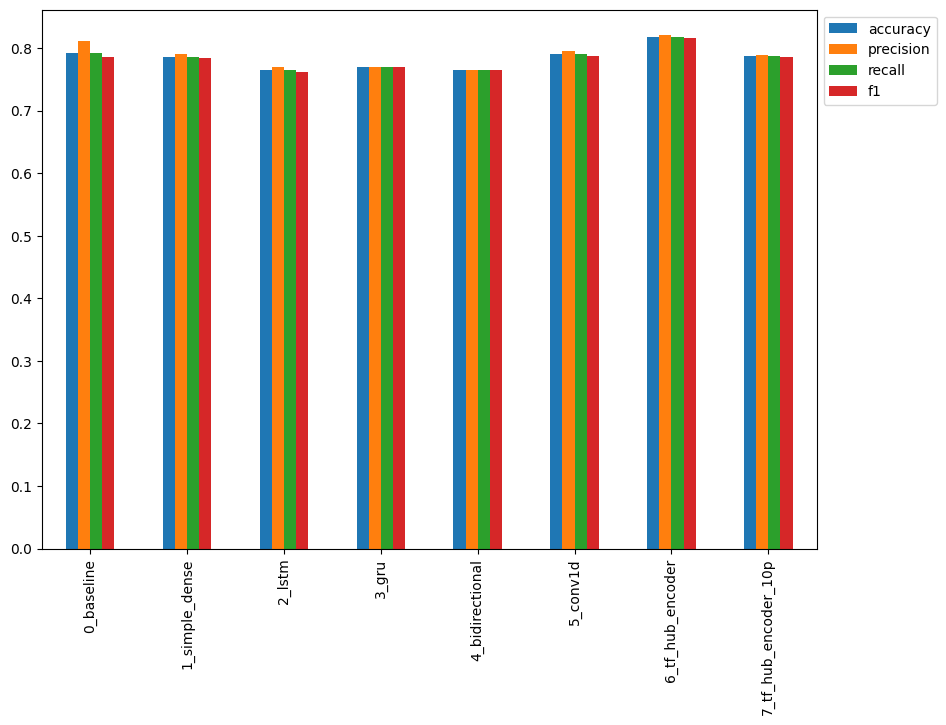

In [162]:
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

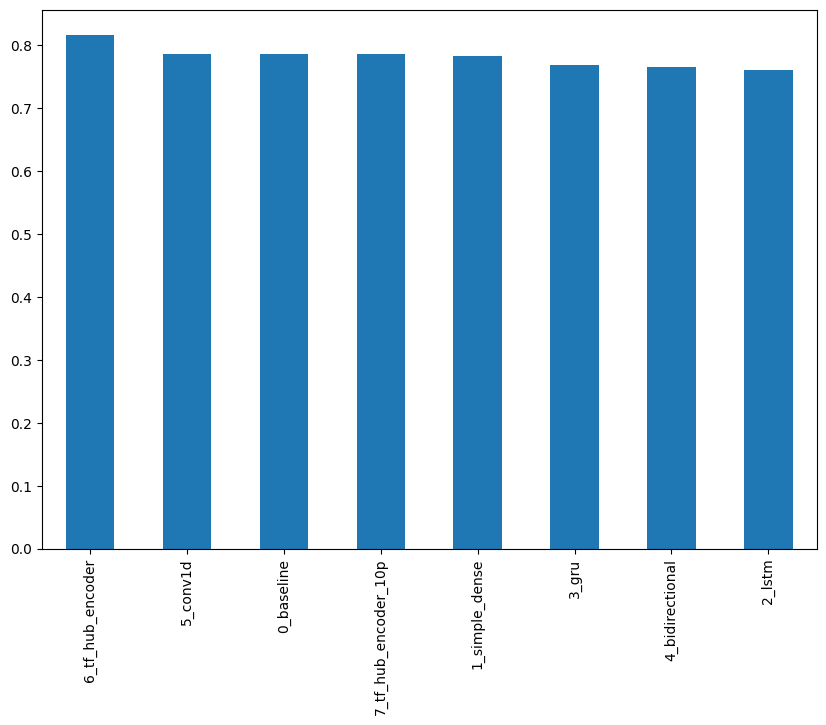

In [163]:
# compare the f1
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

### 模型集成
模型集成（model ensembling/stacking）是指将多个不同的模型结合在一起，以便进行预测。在实际生产系统中，使用模型集成的方法可以提高预测的鲁棒性和性能。

**关键概念：**

1. **模型集成的动机：** 模型集成的核心思想是，如果多个不相关的模型对某个预测达成一致，那么这个预测可能比由单一模型做出的预测更为稳健。这里的关键词是“不相关”，即不同类型的模型。

2. **不同类型的模型：** 在模型集成中，选择不同类型的模型是关键。即使这些模型都在相同的数据上训练，它们仍然以不同的方式发现模式。例如，在这个案例中，可以结合基线模型、双向模型和TensorFlow Hub USE模型。

3. **模型集成的方法：**
   - **平均法（Averaging）：** 将每个模型对每个样本的输出预测概率相加，然后取平均值。
   - **多数投票法（Majority vote / mode）：** 每个模型对所有样本进行类别预测，选择被多数模型预测为类别的结果作为最终的预测标签。
   - **模型堆叠法（Model stacking）：** 将每个选择的模型的输出作为另一个模型的输入。

4. **案例解释：** 以决定去哪里吃饭为例，如果你和朋友们口味相似，可能会选择同一个餐馆。但如果大家口味各异，却依然选择了同一家餐馆，那么这家餐馆可能就是不错的选择。同理，模型集成通过结合不同类型的模型，提高了整体预测的可靠性。

5. **资源推荐：** 引用了机器学习工程师Andriy Burkov的著作《Machine Learning Engineering Book》中第6章的内容，该书涵盖了机器学习工程领域的实践知识，推荐阅读。

In [166]:
# get mean pred prob for 3 models
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis=1)
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_2_pred_probs, axis=1) + tf.squeeze(model_6_pred_probs, axis=1)
combined_preds = tf.round(combined_pred_probs / 3)

In [167]:
ensamble_results = calculate_results(val_labels, combined_preds)
ensamble_results

{'accuracy': 78.60892388451444,
 'precision': 0.7862161422078583,
 'recall': 0.7860892388451444,
 'f1': 0.7851501923128148}

In [169]:
all_model_results.loc["8_ensamble"] = ensamble_results

In [171]:
all_model_results["accuracy"]["8_ensamble"] = all_model_results["accuracy"]["8_ensamble"] / 100
all_model_results

,accuracy,precision,recall,f1
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.786089,0.790328,0.786089,0.783297
2_lstm,0.765092,0.769637,0.765092,0.761542
3_gru,0.770341,0.770197,0.770341,0.769428
4_bidirectional,0.765092,0.764804,0.765092,0.764883
5_conv1d,0.790026,0.795060,0.790026,0.787073
6_tf_hub_encoder,0.817585,0.820262,0.817585,0.815982
7_tf_hub_encoder_10p,0.787402,0.788256,0.787402,0.786033
8_ensamble,0.786089,0.786216,0.786089,0.785150


### 模型保存和载入
1. HDF5 format.
2. SavedModel format (default).

In [173]:
# save model 6 in HDF5 format
model_6.save("model_6_tf_hub_USE.h5")

/Users/sallyw/machine-learning-lab/Tensorflow/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [174]:
# load model
loaded_model_6 = tf.keras.models.load_model("model_6_tf_hub_USE.h5", custom_objects={"KerasLayer": hub.KerasLayer})

In [175]:
# Save TF Hub Sentence Encoder model to SavedModel format (default)
model_6.save("model_6_SavedModel_format")

INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


In [176]:
# Load TF Hub Sentence Encoder SavedModel
loaded_model_6_SavedModel = tf.keras.models.load_model("model_6_SavedModel_format")

### 找到最有问题的预测数据点
finding the most wrong examples.选择最好的模型，找到它预测可能性最高但是却错了的点，分析问题。

In [177]:
# Create dataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_preds,
                       "prob": tf.squeeze(model_6_pred_probs)})
val_df

,text,target,pred,prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.148901
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.742958
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.983856
3,@camilacabello97 Internally and externally scr...,1,0.0,0.195450
4,Radiation emergency #preparedness starts with ...,1,1.0,0.747986
...,...,...,...,...
757,That's the ultimate road to destruction,0,0.0,0.105105
758,@SetZorah dad why dont you claim me that mean ...,0,0.0,0.091936
759,FedEx will no longer transport bioterror patho...,0,1.0,0.861376
760,Crack in the path where I wiped out this morni...,0,1.0,0.688781


In [181]:
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("prob", ascending=False)
most_wrong[:10]

,text,target,pred,prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.914355
759,FedEx will no longer transport bioterror patho...,0,1.0,0.861376
628,@noah_anyname That's where the concentration c...,0,1.0,0.850793
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.837359
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.828156
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.821721
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.792732
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.782048
698,åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Ten...,0,1.0,0.772858
144,The Sound of Arson,0,1.0,0.766945


In [182]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples(): # loop through the top 10 rows (change the index to view different rows)
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1, Prob: 0.9143548607826233
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1, Prob: 0.8613755106925964
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.8507925271987915
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Prob: 0.8373586535453796
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1, Prob: 0.8281558752059937
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target: 0, Pred: 1, Prob: 0.8217206001281738
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1, Pr

In [183]:
# Check the most wrong false negatives (model predicted 0 when should've predict 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0, Prob: 0.06126442551612854
Text:
Next May I'll be free...from school from obligations like family.... Best of all that damn curfew...

----

Target: 1, Pred: 0, Prob: 0.05905182287096977
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0, Prob: 0.056409358978271484
Text:
'The way you move is like a full on rainstorm and I'm a house of cards'

----

Target: 1, Pred: 0, Prob: 0.05178028717637062
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0, Prob: 0.049938395619392395
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0, Prob: 0.043307945132255554
Text:
I get to smoke my shit in peace

----

Target: 1, Pred: 0, Prob: 0.03889784589409828
T

说实话他们看起来不像是1，机器看起来更正确

### 在测试集上进行预测

In [185]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [193]:
test_pred_probs = model_6.predict(test_df["text"].to_numpy())
test_preds = tf.squeeze(tf.round(test_pred_probs))

102/102 [==============================] - 0s 3ms/step


In [194]:
test_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0.], dtype=float32)>

In [195]:
# Making predictions on the test dataset
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 120ms/step
Pred: 1, Prob: 0.5472278594970703
Text:
Flash Flood Watch in effect through 7:00am Thursday morning/12:00pm Thursday afternoon.
For: Perry Wayne Cape... http://t.co/fs7vro5seS

----

1/1 [==============================] - 0s 28ms/step
Pred: 1, Prob: 0.8491577506065369
Text:
Investigators say a fatal Virgin Galactic spaceship crash last year was caused by structural failure after the... http://t.co/FoxpVpTttA

----

1/1 [==============================] - 0s 26ms/step
Pred: 0, Prob: 0.043215420097112656
Text:
Vanessa was about to explode! This is what she wanted to say to Shelli. Their alliance will survive. #BB17 #BBLF http://t.co/rypGKScHng

----

1/1 [==============================] - 0s 30ms/step
Pred: 0, Prob: 0.08835871517658234
Text:
UNIVERSAL ORDER OF ARMAGEDDON http://t.co/3tY4mGm

----

1/1 [==============================] - 0s 29ms/step
Pred: 1, Prob: 0.9691438674926758
Text:
#AUS Aircraft debris found on island is from MH37

In [202]:
# predict tweets from wild
def predict_on_sentence(model, sentence):
    """
    Uses model to make a prediction on sentence.
    Returns the sentence, the predicted label and the prediction probability.
    """
    pred_prob = model.predict([sentence])
    pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
    print(f"Pred: {pred_label}", "(real disaster)" if pred_label > 0 else "(not real disaster)", f"Prob: {pred_prob[0][0]}")
    print(f"Text:\n{sentence}")

In [205]:
test_sentence = "all blood on the ground, is everybody ok?"
predict_on_sentence(model_6, test_sentence)

1/1 [==============================] - 0s 27ms/step
Pred: 0.0 (not real disaster) Prob: 0.1490035057067871
Text:
all blood on the ground, is everybody ok?


### 速度和精准度的权衡
每天有无数的推特发布，如何做到更好的预测，需要一个时间和精准度的权衡。模型要在真正的生产环境中发挥作用才是好模型。

In [207]:
# Calculate the time of predictions
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.
  
  Args:
  ----
  model = a trained model
  sample = a list of samples

  Returns:
  ----
  total_time = total elapsed time for model to make predictions on samples
  time_per_pred = time in seconds per single sample
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(val_sentences) # find prediction time per sample
  return total_time, time_per_pred

In [208]:
# Calculate TF Hub Sentence Encoder prediction times
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 0s 7ms/step


(0.2612414580071345, 0.00034283655906448097)

In [209]:
# Calculate Naive Bayes prediction times
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.04565312503837049, 5.991223758316337e-05)

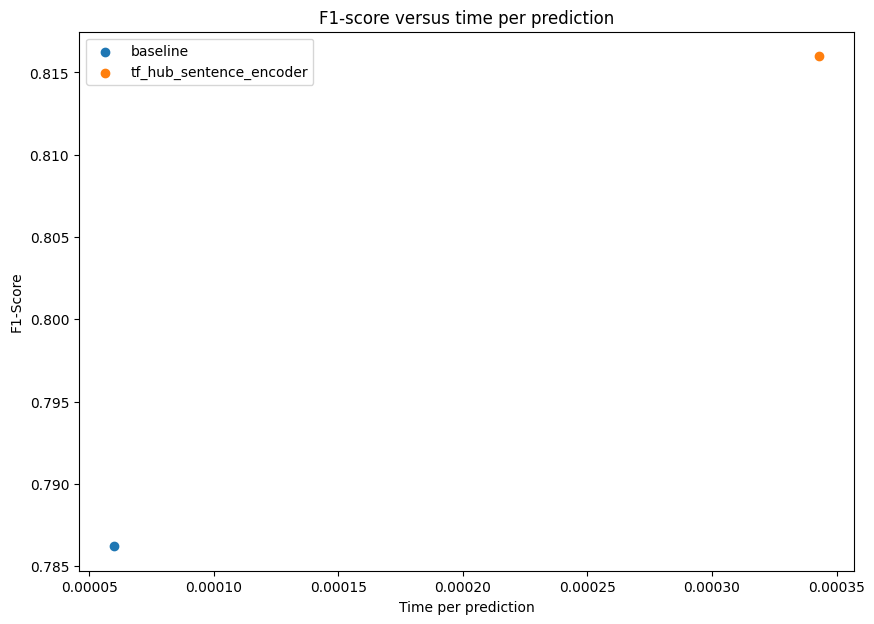

In [210]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");